In [16]:
import pandas_gbq


In [17]:
df = pandas_gbq.read_gbq("SELECT * FROM `nais-analyse-prod-2dcc.deploys.deploys_prod_aggregated`", project_id='nais-analyse-prod-2dcc')

/opt/homebrew/lib/python3.10/site-packages/google/cloud/bigquery/table.py:1979: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(
2022-10-07 14:34:08,670 - pandas_gbq.gbq - INFO - Total time taken 19.76 s.
Finished at 2022-10-07 14:34:08.


In [19]:
df['dato'] = df['deployed_timestamp'].dt.date
df['ukenr'] = df['deployed_timestamp'].dt.isocalendar().week.astype('str')
df['ukenr'] = df['ukenr'].apply( lambda x: x.zfill(2))
df['uke'] = df['deployed_timestamp'].dt.isocalendar().year.astype('str') + '-' + df['ukenr']
df['måned'] = df['deployed_timestamp'].dt.month
df['måned'] = df['måned'].astype('str').apply(lambda x: x.zfill(2))
df['måned'] = df['deployed_timestamp'].dt.isocalendar().year.astype('str') + '-' + df['måned']
df['år'] = df['deployed_timestamp'].dt.isocalendar().year
df['app'] = df['application']

In [24]:
år = df.groupby(['uke', 'år']).size().reset_index(name='antall') \
       .groupby('år').agg(snitt_deploys_per_uke=('antall', 'mean')).reset_index()
år['snitt_deploys_per_uke'] = år['snitt_deploys_per_uke'].round(0)
år = år[år['år']>2014]

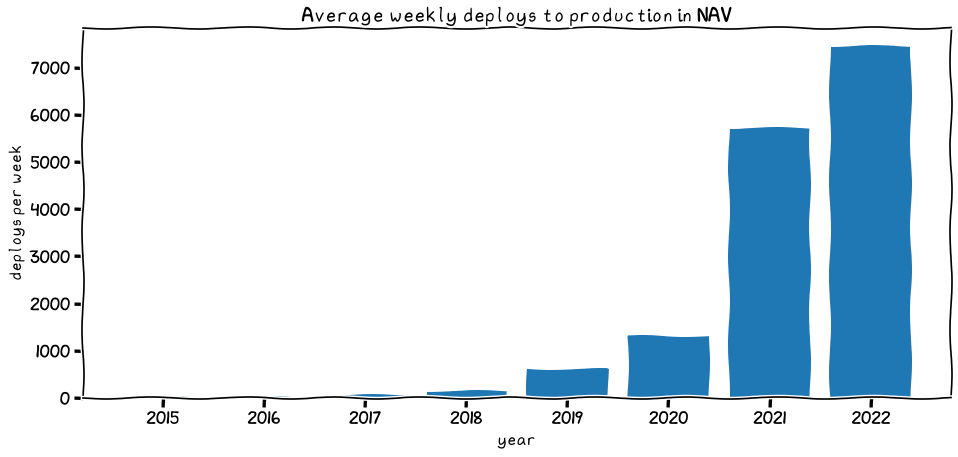

In [25]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(14, 6), dpi=80)
 
with plt.xkcd():
    plt.bar(år['år'], år['snitt_deploys_per_uke'])
    plt.title('Average weekly deploys to production in NAV')
    plt.xlabel('year')
    plt.ylabel('deploys per week')

     
    plt.show()